# Chapter 6 Drawing Geometric Shpaes and Fractals

## Drawing Geometric Shapes with Matplotlib's Patches

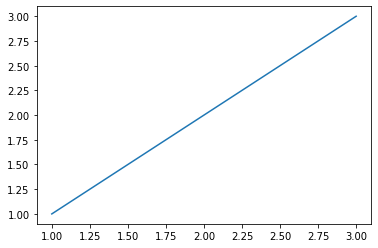

In [2]:
import matplotlib.pyplot as plt
x = list(range(1,4))
y = list(range(1,4))
plt.plot(x, y)
plt.show()

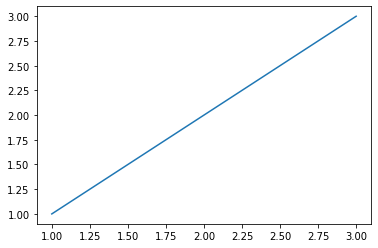

In [4]:
import matplotlib.pyplot as plt
x = list(range(1,4))
y = list(range(1,4))
fig = plt.figure()
ax = plt.axes()
plt.plot(x, y)
plt.show()

### Drawing a Circle

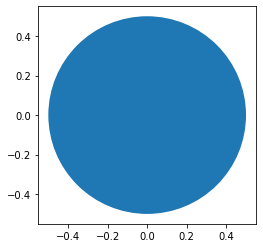

In [6]:
"""
Example of using matplotlib's Circle patch
"""

def create_circle():
    circle = plt.Circle((0, 0), radius=0.5)
    return circle
def show_shape(patch):
    ax = plt.gca()
    ax.add_patch(patch)
    plt.axis('scaled')
    plt.show()
c = create_circle()
show_shape(c)

### Creating Animated Figures

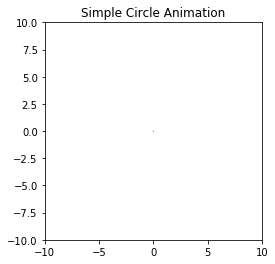

In [7]:
"""
A growing circle 
"""
from matplotlib import pyplot as plt
from matplotlib import animation

def create_circle():
    circle = plt.Circle((0,0), 0.05)
    return circle

def update_radius(i, circle):
    circle.radiu = i*0.5
    return circle,

def create_animation():
    fig = plt.gcf()
    ax = plt.axes(xlim=(-10, 10), ylim=(-10, 10))
    ax.set_aspect('equal')
    circle = create_circle()
    ax.add_patch(circle)
    anim = animation.FuncAnimation(
        fig, update_radius, fargs=(circle, ), frames=30, interval=50)
    plt.title("Simple Circle Animation")
    plt.show()
create_animation()

### Animating a Projectile's Trajectory

Enter the initial velocity (m/s): 2
Enter the angle of projection (degrees): 30


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.


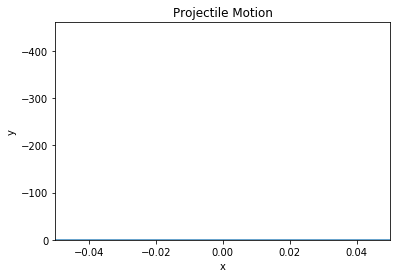

In [10]:
"""
Animate the trajectory of an object in projectile motion
"""

from matplotlib import animation
import math

g = 9.8

def get_intervals(u, theta):
    t_flight = 2*u*math.sin(theta)/g
    intervals = []
    start = 0
    interval = 0.005
    while start < t_flight:
        intervals.append(start)
        start = start+interval
    return intervals

def update_position(i, circle, intervals, u, theta):
    t = intervals[i]
    x = u*math.cos(theta)*t
    y = u*math.sin(theta)*t - 0.5*g*t*t
    circle.center = x, y
    return circle, 
def create_animation(u, theta):
    intervals = get_intervals(u, theta)
    xmin = 0
    xmax = u*math.cos(theta)*intervals[-1]
    ymin = 0
    t_max = u*math.sin(theta)*g
    ymax = u*math.sin(theta)*t_max - 0.5*g*t_max**2
    fig = plt.gcf()
    ax = plt.axes(xlim=(xmin, ymin), ylim=(ymin, ymax))
    circle = plt.Circle((xmin, xmax),  1.0)
    ax.add_patch(circle)
    anim = animation.FuncAnimation(fig, update_position, 
                                   fargs=(circle, intervals, u, theta),
                                   frames = len(intervals),
                                   interval=1,
                                   repeat=False)
    plt.title("Projectile Motion")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

try:
    u = float(input("Enter the initial velocity (m/s): "))
    theta = float(input("Enter the angle of projection (degrees): "))
except ValueError:
    print("You entered an invalid input")
else:
    theta = math.radians(theta)
    create_animation(u, theta)

## Drawing Fractals

### Transformations of Points in a Plane

Enter the number of iterations: 10


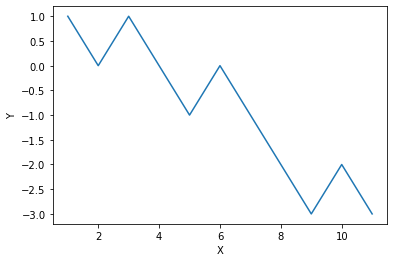

In [14]:
"""
Example of selecting a transformation from two equally probable
transformations
"""
import matplotlib.pyplot as plt
import random

def transformation_1(p):
    x = p[0]
    y = p[1]
    return x+1, y-1
def transformation_2(p):
    x = p[0]
    y = p[1]
    return x+1, y+1
def transform(p):
    # List of transformation functions
    transformations = [transformation_1, transformation_2]
    # Pick a random transformation function and call it 
    t = random.choice(transformations)
    x, y = t(p)
    return x, y

def build_trajectory(p, n):
    x = [p[0]]
    y = [p[1]]
    for i in range(n):
        p = transform(p)
        x.append(p[0])
        y.append(p[1])
    return x, y
# Initial point
p = (1,1)
n = int(input("Enter the number of iterations: "))
x, y = build_trajectory(p, n)
# Plot
plt.plot(x, y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

### Drawing the Barnsley Fern


In [15]:
"""
Draw a Barnsley Fern
"""

import random
import matplotlib.pyplot as plt

def transformation_1(p):
    x = p[0]
    y = p[1]
    x1 = 0.85*x + 0.04*y
    y1 = -0.04*x + 0.85*y + 1.6
    return x1, y1
def transformation_2(p):
    x = p[0]
    y = p[1]
    x1 = 0.2*x - 0.26*y
    y1 = 0.23*x + 0.22*y + 1.6
    return x1, y1
def transformation_3(p):
    x = p[0]
    y = p[1]
    x1 = -0.15*x + 0.28*y
    y1 = 0.26*x + 0.24*y + 0.44 
    return x1, y1
def transformation_4(p):
    x = p[0]
    y = p[1]
    x1 = 0
    y1 = 0.16*y 
    return x1, y1

Enter the number of points in the Fern: 5000


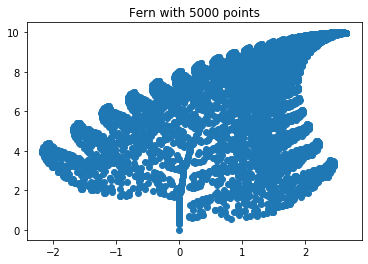

In [20]:
def get_index(probability):
    r = random.random()
    c_probability = 0
    sum_probability = []
    for p in probability:
        c_probability += p
        sum_probability.append(c_probability)
    for item, sp in enumerate(sum_probability):
        if r <= sp:
            return item
    return len(probability)-1
def transform(p):
    # list of transformation function
    transformations = [transformation_1, transformation_2, transformation_3, transformation_4]
    probability = [0.85, 0.07, 0.07, 0.01]
    # Pick a random transformation function and call it
    tindex = get_index(probability)
    t = transformations[tindex]
    x, y = t(p)
    return x, y

def draw_fern(n):
    # We start with (0,0)
    x = [0]
    y = [0]
    x1, y1 = 0, 0
    for i in range(n):
        x1, y1 = transform((x1, y1))
        x.append(x1)
        y.append(y1)
    return x, y

n = int(input("Enter the number of points in the Fern: "))
x, y = draw_fern(n)
# Plot the points
plt.plot(x, y, 'o')
plt.title("Fern with {0} points".format(n))
plt.show()

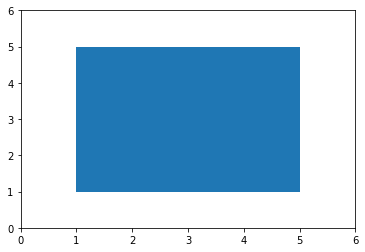

In [22]:
'''
Draw a square 
'''
from matplotlib import pyplot as plt
def draw_square():
    ax = plt.axes(xlim = (0, 6), ylim = (0, 6))
    square = plt.Polygon([(1, 1), (5, 1), (5, 5), (1, 5)], closed = True) 
    ax.add_patch(square)
    plt.show()
draw_square()